### Conditions description:
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc



/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [2]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe for 1st scores 
c1_pc_df1 = pd.DataFrame()
c2_pc_df1 = pd.DataFrame()
c3_pc_df1 = pd.DataFrame()
c4_pc_df1 = pd.DataFrame()

c1_wcs_df1 = pd.DataFrame()
c2_wcs_df1 = pd.DataFrame()
c3_wcs_df1 = pd.DataFrame()
c4_wcs_df1 = pd.DataFrame()

# Creat psudo-empty dataframe for 2nd scores 
c1_pc_df2 = pd.DataFrame()
c2_pc_df2 = pd.DataFrame()
c3_pc_df2 = pd.DataFrame()
c4_pc_df2 = pd.DataFrame()

c1_wcs_df2 = pd.DataFrame()
c2_wcs_df2 = pd.DataFrame()
c3_wcs_df2 = pd.DataFrame()
c4_wcs_df2 = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        c1_pc_mean1 = pc_c1[0, :] 
        c2_pc_mean1 = pc_c2[0, :] 
        c3_pc_mean1 = pc_c3[0, :] 
        c4_pc_mean1 = pc_c4[0, :] 
        
        c1_wcs_mean1 = wcs_c1[0, :] 
        c2_wcs_mean1 = wcs_c2[0, :] 
        c3_wcs_mean1 = wcs_c3[0, :] 
        c4_wcs_mean1 = wcs_c4[0, :] 
        
        c1_pc_mean2 = pc_c1[1, :] 
        c2_pc_mean2 = pc_c2[1, :] 
        c3_pc_mean2 = pc_c3[1, :] 
        c4_pc_mean2 = pc_c4[1, :] 
        
        c1_wcs_mean2 = wcs_c1[1, :] 
        c2_wcs_mean2 = wcs_c2[1, :] 
        c3_wcs_mean2 = wcs_c3[1, :] 
        c4_wcs_mean2 = wcs_c4[1, :] 
        
        # Appending data to df1
        c1_pc_df1[name] = c1_pc_mean1
        c2_pc_df1[name] = c2_pc_mean1
        c3_pc_df1[name] = c3_pc_mean1
        c4_pc_df1[name] = c4_pc_mean1
        
        c1_wcs_df1[name] = c1_wcs_mean1
        c2_wcs_df1[name] = c2_wcs_mean1
        c3_wcs_df1[name] = c3_wcs_mean1
        c4_wcs_df1[name] = c4_wcs_mean1
        
        # Appending data to df2
        c1_pc_df2[name] = c1_pc_mean2
        c2_pc_df2[name] = c2_pc_mean2
        c3_pc_df2[name] = c3_pc_mean2
        c4_pc_df2[name] = c4_pc_mean2
        
        c1_wcs_df2[name] = c1_wcs_mean2
        c2_wcs_df2[name] = c2_wcs_mean2
        c3_wcs_df2[name] = c3_wcs_mean2
        c4_wcs_df2[name] = c4_wcs_mean2

             
print("c1_pc_df1 shape: " + str(c1_pc_df1.shape))
print("c2_pc_df1 shape: " + str(c2_pc_df1.shape))
print("c3_pc_df1 shape: " + str(c3_pc_df1.shape))
print("c4_pc_df1 shape: " + str(c4_pc_df1.shape))

print("\nc1_wcs_df1 shape: " + str(c1_wcs_df1.shape))
print("c2_wcs_df1 shape: " + str(c2_wcs_df1.shape))
print("c3_wcs_df1 shape: " + str(c3_wcs_df1.shape))
print("c4_wcs_df1 shape: " + str(c4_wcs_df1.shape))

print("\nc1_pc_df2 shape: " + str(c1_pc_df2.shape))
print("c2_pc_df2 shape: " + str(c2_pc_df2.shape))
print("c3_pc_df2 shape: " + str(c3_pc_df2.shape))
print("c4_pc_df2 shape: " + str(c4_pc_df2.shape))

print("\nc1_wcs_df2 shape: " + str(c1_wcs_df2.shape))
print("c2_wcs_df2 shape: " + str(c2_wcs_df2.shape))
print("c3_wcs_df2 shape: " + str(c3_wcs_df2.shape))
print("c4_wcs_df2 shape: " + str(c4_wcs_df2.shape))

c1_pc_df1 shape: (400, 26)
c2_pc_df1 shape: (400, 26)
c3_pc_df1 shape: (400, 26)
c4_pc_df1 shape: (400, 26)

c1_wcs_df1 shape: (400, 26)
c2_wcs_df1 shape: (400, 26)
c3_wcs_df1 shape: (400, 26)
c4_wcs_df1 shape: (400, 26)

c1_pc_df2 shape: (400, 26)
c2_pc_df2 shape: (400, 26)
c3_pc_df2 shape: (400, 26)
c4_pc_df2 shape: (400, 26)

c1_wcs_df2 shape: (400, 26)
c2_wcs_df2 shape: (400, 26)
c3_wcs_df2 shape: (400, 26)
c4_wcs_df2 shape: (400, 26)


In [3]:
# Checking WCS scores for below zero values

#print("c1_wcs_df1 min: " + str(c1_wcs_df1.min(axis=0)))



In [4]:
# Computing mean across participants for each condition
# 1st scores
c1_total_pc_mean1 = np.array(c1_pc_df1.mean(axis=1))
c2_total_pc_mean1 = np.array(c2_pc_df1.mean(axis=1))
c3_total_pc_mean1 = np.array(c3_pc_df1.mean(axis=1))
c4_total_pc_mean1 = np.array(c4_pc_df1.mean(axis=1))

print("c1_total_pc_mean1 shape: " + str(c1_total_pc_mean1.shape))
print("c2_total_pc_mean1 shape: " + str(c2_total_pc_mean1.shape))
print("c3_total_pc_mean1 shape: " + str(c3_total_pc_mean1.shape))
print("c4_total_pc_mean1 shape: " + str(c4_total_pc_mean1.shape))

c1_total_wcs_mean1 = np.array(c1_wcs_df1.mean(axis=1))
c2_total_wcs_mean1 = np.array(c2_wcs_df1.mean(axis=1))
c3_total_wcs_mean1 = np.array(c3_wcs_df1.mean(axis=1))
c4_total_wcs_mean1 = np.array(c4_wcs_df1.mean(axis=1))

print("\nc1_total_wcs_mean1 shape: " + str(c1_total_wcs_mean1.shape))
print("c2_total_wcs_mean1 shape: " + str(c2_total_wcs_mean1.shape))
print("c3_total_wcs_mean1 shape: " + str(c3_total_wcs_mean1.shape))
print("c4_total_wcs_mean1 shape: " + str(c4_total_wcs_mean1.shape))

# 2nd scores
c1_total_pc_mean2 = np.array(c1_pc_df2.mean(axis=1))
c2_total_pc_mean2 = np.array(c2_pc_df2.mean(axis=1))
c3_total_pc_mean2 = np.array(c3_pc_df2.mean(axis=1))
c4_total_pc_mean2 = np.array(c4_pc_df2.mean(axis=1))

print("\nc1_total_pc_mean2 shape: " + str(c1_total_pc_mean2.shape))
print("c2_total_pc_mean2 shape: " + str(c2_total_pc_mean2.shape))
print("c3_total_pc_mean2 shape: " + str(c3_total_pc_mean2.shape))
print("c4_total_pc_mean2 shape: " + str(c4_total_pc_mean2.shape))

c1_total_wcs_mean2 = np.array(c1_wcs_df2.mean(axis=1))
c2_total_wcs_mean2 = np.array(c2_wcs_df2.mean(axis=1))
c3_total_wcs_mean2 = np.array(c3_wcs_df2.mean(axis=1))
c4_total_wcs_mean2 = np.array(c4_wcs_df2.mean(axis=1))

print("\nc1_total_wcs_mean2 shape: " + str(c1_total_wcs_mean2.shape))
print("c2_total_wcs_mean2 shape: " + str(c2_total_wcs_mean2.shape))
print("c3_total_wcs_mean2 shape: " + str(c3_total_wcs_mean2.shape))
print("c4_total_wcs_mean2 shape: " + str(c4_total_wcs_mean2.shape))


c1_total_pc_mean1 shape: (400,)
c2_total_pc_mean1 shape: (400,)
c3_total_pc_mean1 shape: (400,)
c4_total_pc_mean1 shape: (400,)

c1_total_wcs_mean1 shape: (400,)
c2_total_wcs_mean1 shape: (400,)
c3_total_wcs_mean1 shape: (400,)
c4_total_wcs_mean1 shape: (400,)

c1_total_pc_mean2 shape: (400,)
c2_total_pc_mean2 shape: (400,)
c3_total_pc_mean2 shape: (400,)
c4_total_pc_mean2 shape: (400,)

c1_total_wcs_mean2 shape: (400,)
c2_total_wcs_mean2 shape: (400,)
c3_total_wcs_mean2 shape: (400,)
c4_total_wcs_mean2 shape: (400,)


In [5]:
# Checking WCS scores for below zero values
print("c1_total_wcs_mean1 min:" + str(c1_total_wcs_mean1.min()))
print("c1_total_wcs_mean1 max:" + str(c1_total_wcs_mean1.max()))
print("c2_total_wcs_mean1 min:" + str(c2_total_wcs_mean1.min()))
print("c2_total_wcs_mean1 max:" + str(c2_total_wcs_mean1.max()))
print("c3_total_wcs_mean1 min:" + str(c3_total_wcs_mean1.min()))
print("c3_total_wcs_mean1 max:" + str(c3_total_wcs_mean1.max()))
print("c4_total_wcs_mean1 min:" + str(c4_total_wcs_mean1.min()))
print("c4_total_wcs_mean1 max:" + str(c4_total_wcs_mean1.max()))

print("\nc1_total_wcs_mean2 min:" + str(c1_total_wcs_mean2.min()))
print("c1_total_wcs_mean2 max:" + str(c1_total_wcs_mean2.max()))
print("c2_total_wcs_mean2 min:" + str(c2_total_wcs_mean2.min()))
print("c2_total_wcs_mean2 max:" + str(c2_total_wcs_mean2.max()))
print("c3_total_wcs_mean2 min:" + str(c3_total_wcs_mean2.min()))
print("c3_total_wcs_mean2 max:" + str(c3_total_wcs_mean2.max()))
print("c4_total_wcs_mean2 min:" + str(c4_total_wcs_mean2.min()))
print("c4_total_wcs_mean2 max:" + str(c4_total_wcs_mean2.max()))


c1_total_wcs_mean1 min:-1.1543509572540254
c1_total_wcs_mean1 max:0.9435282217650696
c2_total_wcs_mean1 min:-0.9877030538583254
c2_total_wcs_mean1 max:1.0556644084380638
c3_total_wcs_mean1 min:-1.1608382462940217
c3_total_wcs_mean1 max:1.0902778381522384
c4_total_wcs_mean1 min:-1.0583893682853498
c4_total_wcs_mean1 max:1.0305753868374141

c1_total_wcs_mean2 min:-1.020075183110283
c1_total_wcs_mean2 max:0.9783657184024057
c2_total_wcs_mean2 min:-1.1306024295999377
c2_total_wcs_mean2 max:1.1539905261225756
c3_total_wcs_mean2 min:-1.1358507847569266
c3_total_wcs_mean2 max:1.3254359443480679
c4_total_wcs_mean2 min:-1.058677292248101
c4_total_wcs_mean2 max:0.9528132099962918


## Compute high vs. low interference

In [6]:
# 1st scores
PC_low_int_1 = np.array((c1_total_pc_mean1 + c2_total_pc_mean1)/2)
PC_high_int_1 = np.array((c3_total_pc_mean1 + c4_total_pc_mean1)/2)

print("PC_low_int_1 shape: " + str(PC_low_int_1.shape))
print("PC_high_int_1 shape: " + str(PC_high_int_1.shape))

WCS_low_int_1 = np.array((c1_total_wcs_mean1 + c2_total_wcs_mean1)/2)
WCS_high_int_1 = np.array((c3_total_wcs_mean1 + c4_total_wcs_mean1)/2)

print("\nWCS_low_int_1 shape: " + str(WCS_low_int_1.shape))
print("WCS_high_int_1 shape: " + str(WCS_high_int_1.shape))

# 2nd scores
PC_low_int_2 = np.array((c1_total_pc_mean2 + c2_total_pc_mean2)/2)
PC_high_int_2 = np.array((c3_total_pc_mean2 + c4_total_pc_mean2)/2)

print("\nPC_low_int_2 shape: " + str(PC_low_int_2.shape))
print("PC_high_int_2 shape: " + str(PC_high_int_2.shape))

WCS_low_int_2 = np.array((c1_total_wcs_mean2 + c2_total_wcs_mean2)/2)
WCS_high_int_2 = np.array((c3_total_wcs_mean2 + c4_total_wcs_mean2)/2)

print("\nWCS_low_int_2 shape: " + str(WCS_low_int_2.shape))
print("WCS_high_int_2 shape: " + str(WCS_high_int_2.shape))

PC_low_int_1 shape: (400,)
PC_high_int_1 shape: (400,)

WCS_low_int_1 shape: (400,)
WCS_high_int_1 shape: (400,)

PC_low_int_2 shape: (400,)
PC_high_int_2 shape: (400,)

WCS_low_int_2 shape: (400,)
WCS_high_int_2 shape: (400,)


In [7]:
print("WCS_low_int_1 min:" + str(WCS_low_int_1.min()))
print("WCS_low_int_1 max:" + str(WCS_low_int_1.max()))

print("\nWCS_high_int_1 min:" + str(WCS_high_int_1.min()))
print("WCS_high_int_1 max:" + str(WCS_high_int_1.max()))

print("\nWCS_low_int_2 min:" + str(WCS_low_int_2.min()))
print("WCS_low_int_2 max:" + str(WCS_low_int_2.max()))

print("\nWCS_high_int_2 min:" + str(WCS_high_int_2.min()))
print("WCS_high_int_2 max:" + str(WCS_high_int_2.max()))
#Why I am getting below zero values for WCS, seems pretty weird.

WCS_low_int_1 min:-1.008493942307668
WCS_low_int_1 max:0.9673874152337651

WCS_high_int_1 min:-1.1027585054019973
WCS_high_int_1 max:1.0062812877020515

WCS_low_int_2 min:-1.0209807601548513
WCS_low_int_2 max:1.0112016085049382

WCS_high_int_2 min:-1.0972640385025136
WCS_high_int_2 max:1.0873800314810502


## Get coordinates from each node

In [8]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [9]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Useful functions

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img

def min_max_scal(data):
    
    data_c = data.copy()
    m = data.size
    
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = (data[x] - data.min())/(data.max() - data.min())
        
    return data_c


In [11]:
def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    s_obj.color_sources(data=data, cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) #vertices=alt_vertices
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) # row_span=1, title='PC C1'
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )

def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=12, txtsz=10., 
                          vmax=data.max(), vmin=data.min(), limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4))
    scene.add_to_subplot(cb_proj, row=row, col=col) #, row_span=0.5, col_span=0.5
   

In [12]:
def coupled_add_B3_to_scene(scene1, scene2, data, coords):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data[0:400]
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 

    ## First Object
    # Create 'source object'    
    s_obj1 = SourceObj('SourceExample', coords, **kwargs) 
    s_obj2 = SourceObj('SourceExample', coords, **kwargs) 
    
    # Add color to nodes
    s_obj1.color_sources(data=data[0:400], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())) #, vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())
    s_obj2.color_sources(data=data[0:400], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj1 = BrainObj('B3', hemisphere="both", translucent=False)
    b_obj2 = BrainObj('B3', hemisphere="both", translucent=False)
    
    # Add objects to scene
    scene1.add_to_subplot(s_obj1, row=0, col=0, row_span=1, **KW) 
    scene1.add_to_subplot(b_obj1, row=0, col=0, row_span=1, rotate="left", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    scene1.add_to_subplot(s_obj2, row=0, col=1, row_span=1, **KW) 
    scene1.add_to_subplot(b_obj2, row=0, col=1, row_span=1, rotate="right", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    
    # Add data
    # Create 'source object'
    kwargs['data'] = data[0:200]
    s_obj3 = SourceObj('SourceExample', coords[200:400], **kwargs)
    kwargs['data'] = data[200:400]
    s_obj4 = SourceObj('SourceExample', coords[0:200], **kwargs) 
    
    # Add color to nodes
    s_obj3.color_sources(data=data[0:200], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    s_obj4.color_sources(data=data[200:400], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj3 = BrainObj('B3', hemisphere="right", translucent=False)
    b_obj4 = BrainObj('B3', hemisphere="left", translucent=False)
    
    # Add objects to scene
    scene1.add_to_subplot(s_obj3, row=1, col=0, row_span=1, **KW) 
    scene1.add_to_subplot(b_obj3, row=1, col=0, row_span=1, rotate="left", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    scene1.add_to_subplot(s_obj4, row=1, col=1, row_span=1, **KW) 
    scene1.add_to_subplot(b_obj4, row=1, col=1, row_span=1, rotate="right", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    
    ## Second Object
    kwargs['data'] = data[400:800]
    # Create 'source object'    
    s_obj5 = SourceObj('SourceExample', coords, **kwargs) 
    s_obj6 = SourceObj('SourceExample', coords, **kwargs) 
    
    # Add color to nodes
    s_obj5.color_sources(data=data[400:800], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())) #, vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max())
    s_obj6.color_sources(data=data[400:800], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj5 = BrainObj('B3', hemisphere="both", translucent=False)
    b_obj6 = BrainObj('B3', hemisphere="both", translucent=False)
    
    # Add objects to scene
    scene2.add_to_subplot(s_obj5, row=0, col=0, row_span=1, **KW) 
    scene2.add_to_subplot(b_obj5, row=0, col=0, row_span=1, rotate="left", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    scene2.add_to_subplot(s_obj6, row=0, col=1, row_span=1, **KW) 
    scene2.add_to_subplot(b_obj6, row=0, col=1, row_span=1, rotate="right", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    
    kwargs['data'] = data[400:600]
    s_obj7 = SourceObj('SourceExample', coords[200:400], **kwargs)
    kwargs['data'] = data[600:800]
    s_obj8 = SourceObj('SourceExample', coords[0:200], **kwargs) 
    
    # Add color to nodes
    s_obj7.color_sources(data=data[400:600], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    s_obj8.color_sources(data=data[600:800], cmap="viridis", vmax=data.max(), vmin=data.min(), clim=(data.min(), data.max()))
    
    # Create 'Brain object'
    b_obj7 = BrainObj('B3', hemisphere="right", translucent=False)
    b_obj8 = BrainObj('B3', hemisphere="left", translucent=False)
    
    # Add objects to scene
    scene2.add_to_subplot(s_obj7, row=1, col=0, row_span=1, **KW) 
    scene2.add_to_subplot(b_obj7, row=1, col=0, row_span=1, rotate="left", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    scene2.add_to_subplot(s_obj8, row=1, col=1, row_span=1, **KW) 
    scene2.add_to_subplot(b_obj8, row=1, col=1, row_span=1, rotate="right", use_this_cam=True, height_max=2500, width_max=2000, zoom=3)
    
def add_CB_to_scene_2cols(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    cb_proj = ColorbarObj('cbar', cblabel=cbtitle, cmap="viridis", cbtxtsz=30, txtsz=30., 
                           limtxt=False, width=.1, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4), clim=(data.min(), data.max())) #vmax=1, vmin=0,
    #Weird bug plotted range [.048, .5] though min() and max() printed 0, 1
    scene.add_to_subplot(cb_proj, row=row, col=col, row_span=2, width_max=250) 

## Brain-plots (with default range coloring nodes & colorbar)


###  Brain-plot PC 1st scores

In [13]:
PC1 = np.hstack((PC_low_int_1, PC_high_int_1))
#PC1 = min_max_scal(PC1)
print(PC1.min())
print(PC1.max())

0.046216371043391595
0.5434951291066454


In [14]:
SC_PC1_low = SceneObj(bgcolor='black', size=(1100, 1000))
SC_PC1_high = SceneObj(bgcolor='black', size=(1100, 1000))

KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

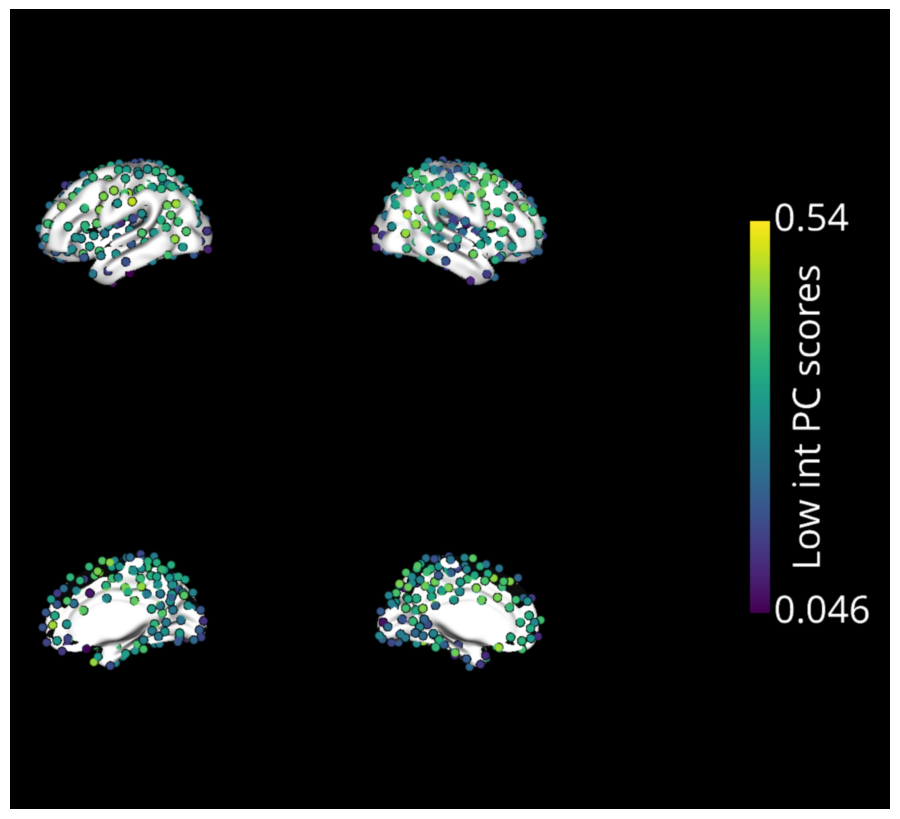

In [15]:
coupled_add_B3_to_scene(scene1=SC_PC1_low, scene2=SC_PC1_high, data=PC1, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_PC1_low, data=PC1, row=0, col=2, cbtitle="Low int PC scores")

SC_PC1_low.preview(mpl=True)

ColorbarObj(name='cbar') created
    ColorbarObj(name='cbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


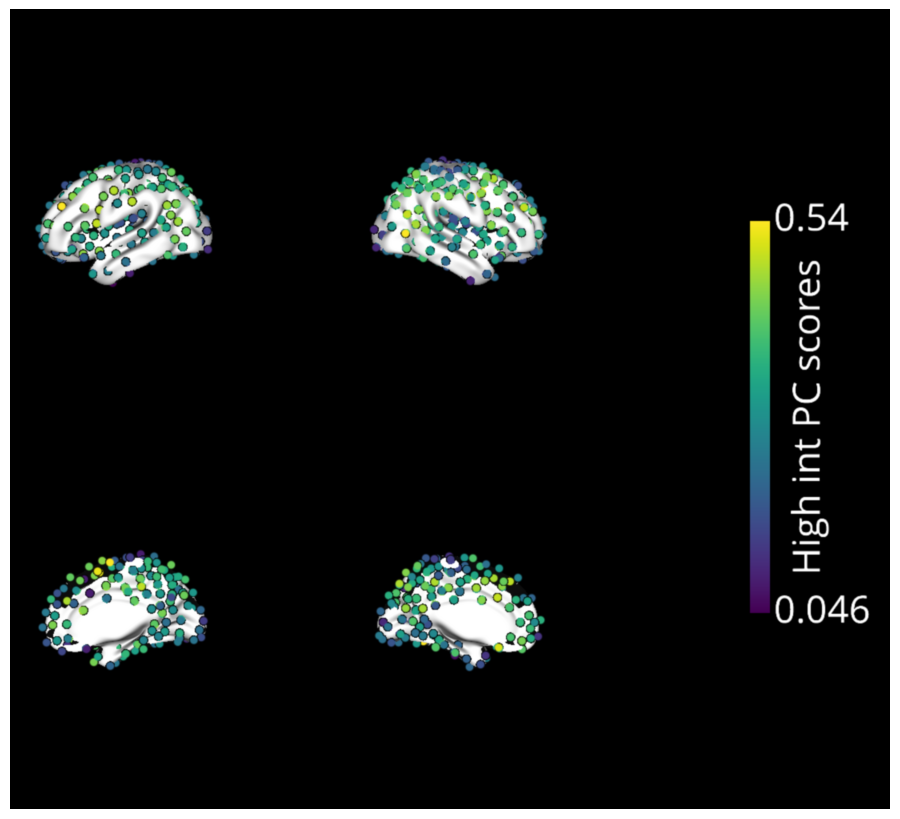

In [16]:
add_CB_to_scene_2cols(scene=SC_PC1_high, data=PC1, row=0, col=2, cbtitle="High int PC scores")
SC_PC1_high.preview(mpl=True)


###  Brain-plot PC 2nd scores

In [17]:
PC2 = np.hstack((PC_low_int_2, PC_high_int_2))
#PC2 = min_max_scal(PC2)
print(PC1.min())
print(PC1.max())

0.046216371043391595
0.5434951291066454


In [18]:
SC_PC2_low = SceneObj(bgcolor='black', size=(1100, 1000))
SC_PC2_high = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

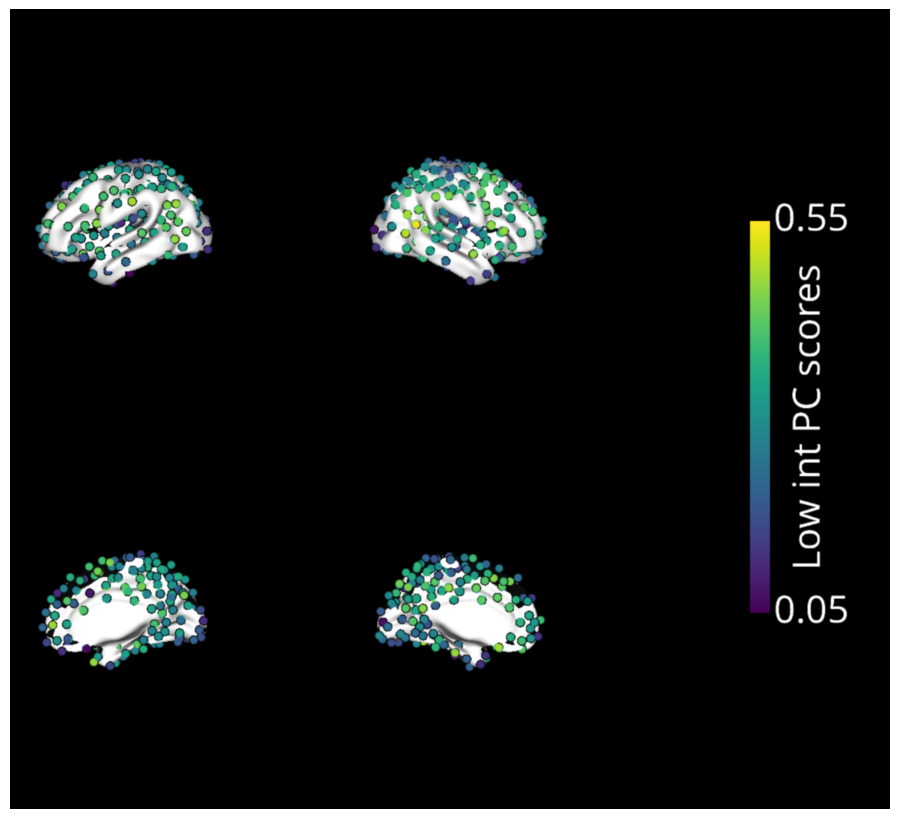

In [19]:
coupled_add_B3_to_scene(scene1=SC_PC2_low, scene2=SC_PC2_high, data=PC2, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_PC2_low, data=PC2, row=0, col=2, cbtitle="Low int PC scores")

SC_PC2_low.preview(mpl=True)

ColorbarObj(name='cbar') created
    ColorbarObj(name='cbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


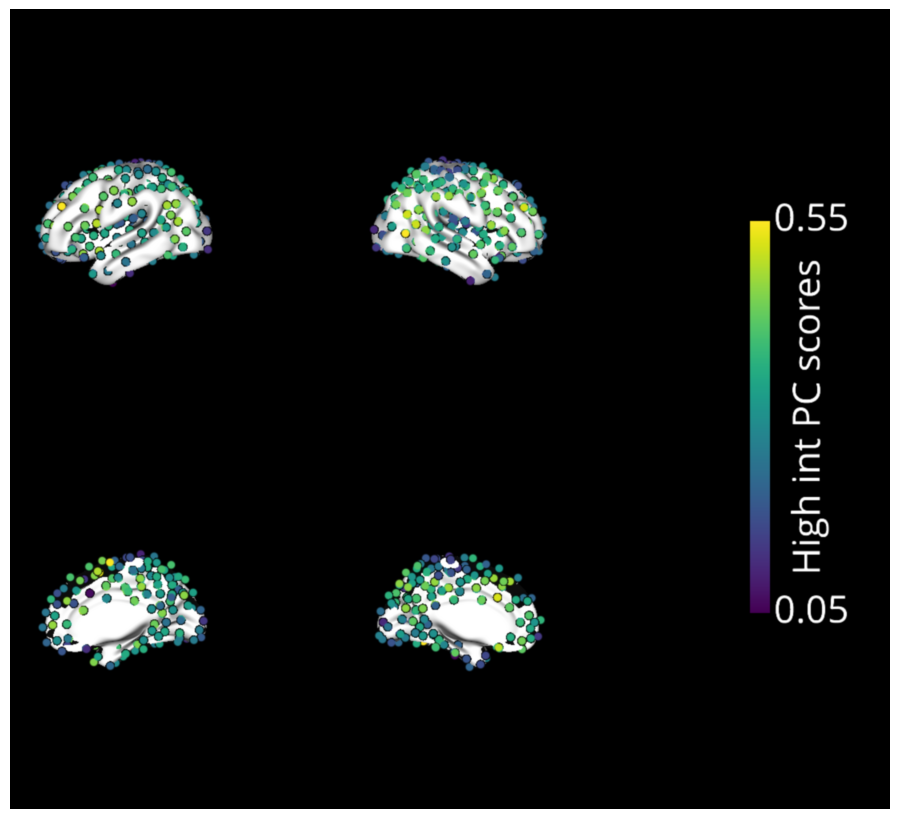

In [20]:
add_CB_to_scene_2cols(scene=SC_PC2_high, data=PC2, row=0, col=2, cbtitle="High int PC scores")
SC_PC2_high.preview(mpl=True)

###  Brain-plot WCS 1st scores

In [21]:
WCS1 = np.hstack((WCS_low_int_1, WCS_high_int_1))
#WCS1 = min_max_scal(WCS1)
print(WCS1.min())
print(WCS1.max())

-1.1027585054019973
1.0062812877020515


In [22]:
SC_WCS1_low = SceneObj(bgcolor='black', size=(1100, 1000))
SC_WCS1_high = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

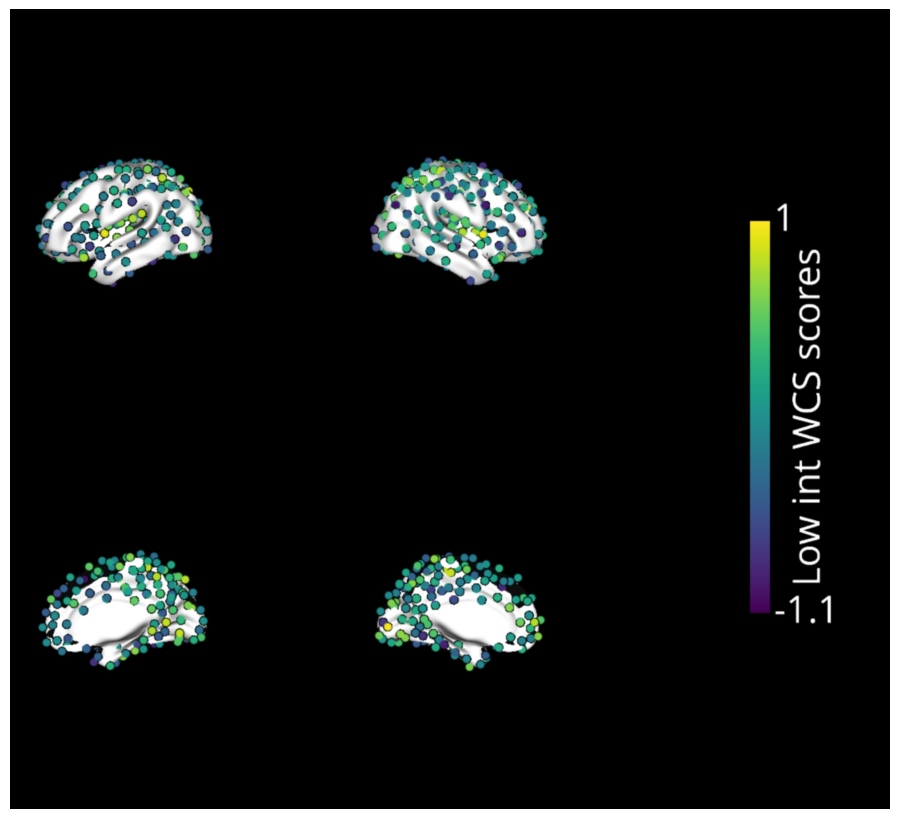

In [23]:
coupled_add_B3_to_scene(scene1=SC_WCS1_low, scene2=SC_WCS1_high, data=WCS1, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_WCS1_low, data=WCS1, row=0, col=2, cbtitle="Low int WCS scores")

SC_WCS1_low.preview(mpl=True)

ColorbarObj(name='cbar') created
    ColorbarObj(name='cbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


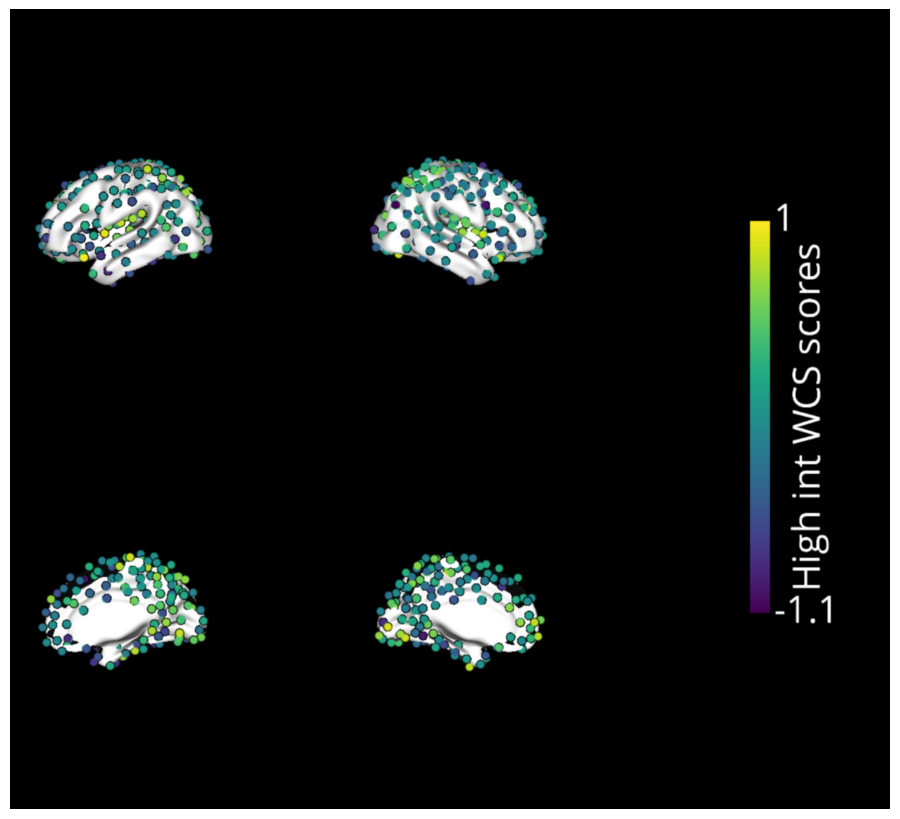

In [24]:
add_CB_to_scene_2cols(scene=SC_WCS1_high, data=WCS1, row=0, col=2, cbtitle="High int WCS scores")
SC_WCS1_high.preview(mpl=True)

###  Brain-plot WCS 2nd scores

In [25]:
WCS2 = np.hstack((WCS_low_int_2, WCS_high_int_2))
#WCS2 = min_max_scal(WCS1)
print(WCS2.min())
print(WCS2.max())

-1.0972640385025136
1.0873800314810502


In [26]:
SC_WCS2_low = SceneObj(bgcolor='black', size=(1100, 1000))
SC_WCS2_high = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

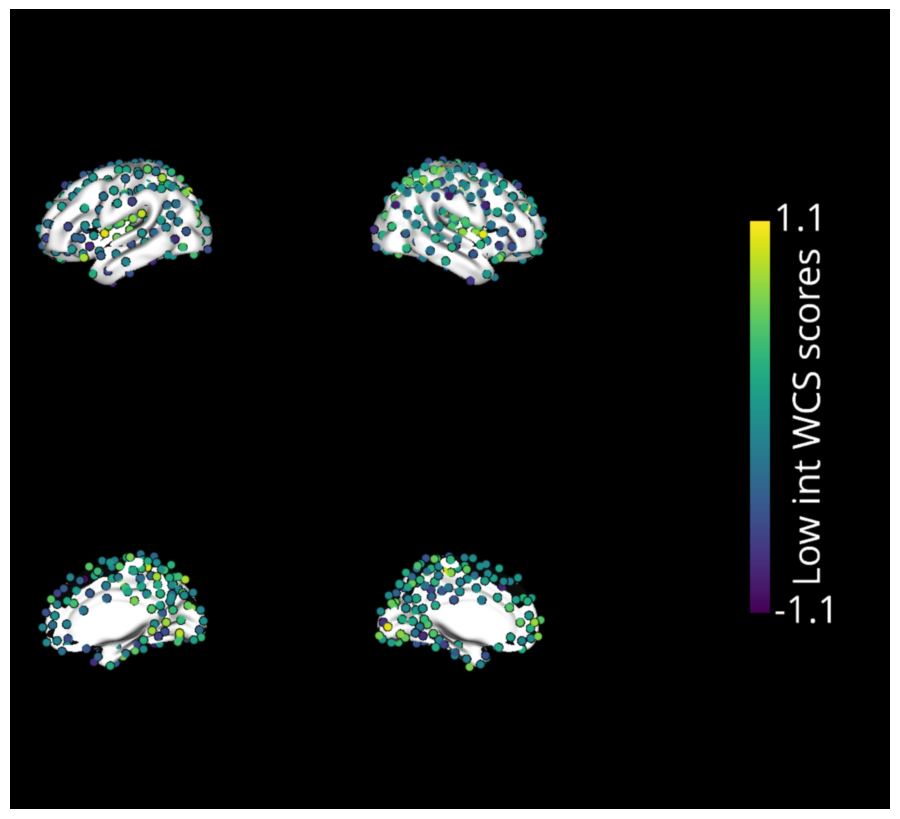

In [27]:
coupled_add_B3_to_scene(scene1=SC_WCS2_low, scene2=SC_WCS2_high, data=WCS2, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_WCS2_low, data=WCS2, row=0, col=2, cbtitle="Low int WCS scores")

SC_WCS2_low.preview(mpl=True)

ColorbarObj(name='cbar') created
    ColorbarObj(name='cbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


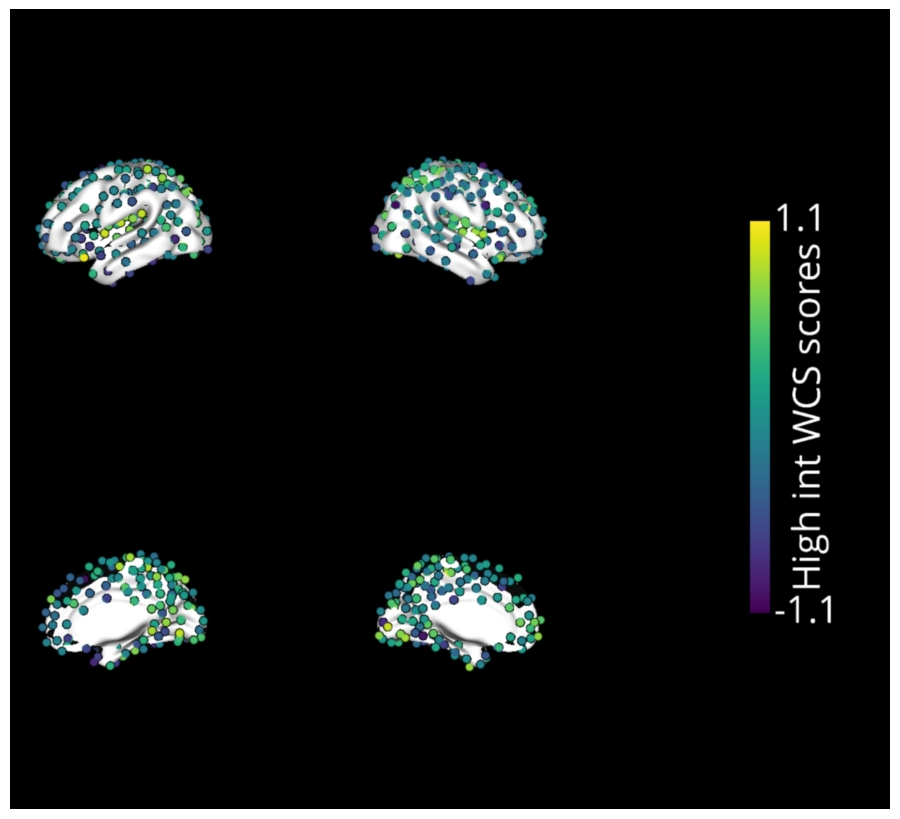

In [28]:
add_CB_to_scene_2cols(scene=SC_WCS2_high, data=WCS2, row=0, col=2, cbtitle="High int WCS scores")
SC_WCS2_high.preview(mpl=True)

# Difference between conditions PC&WCS 

## High minus Low interference 1st PC scores

In [29]:
PC1_HighmLow = PC_high_int_1 - PC_low_int_1
PC1_HighmLow = np.hstack((PC1_HighmLow, PC1_HighmLow))

print("PC1_HighmLow min: " + str(PC1_HighmLow.min()))
print("PC1_HighmLow max: " + str(PC1_HighmLow.max()))

PC1_HighmLow min: -0.09883501990473278
PC1_HighmLow max: 0.11265716951982


In [30]:
SC_PC1_HighmLow = SceneObj(bgcolor='black', size=(1100, 1000))
SC_PC1_HighmLow2 = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

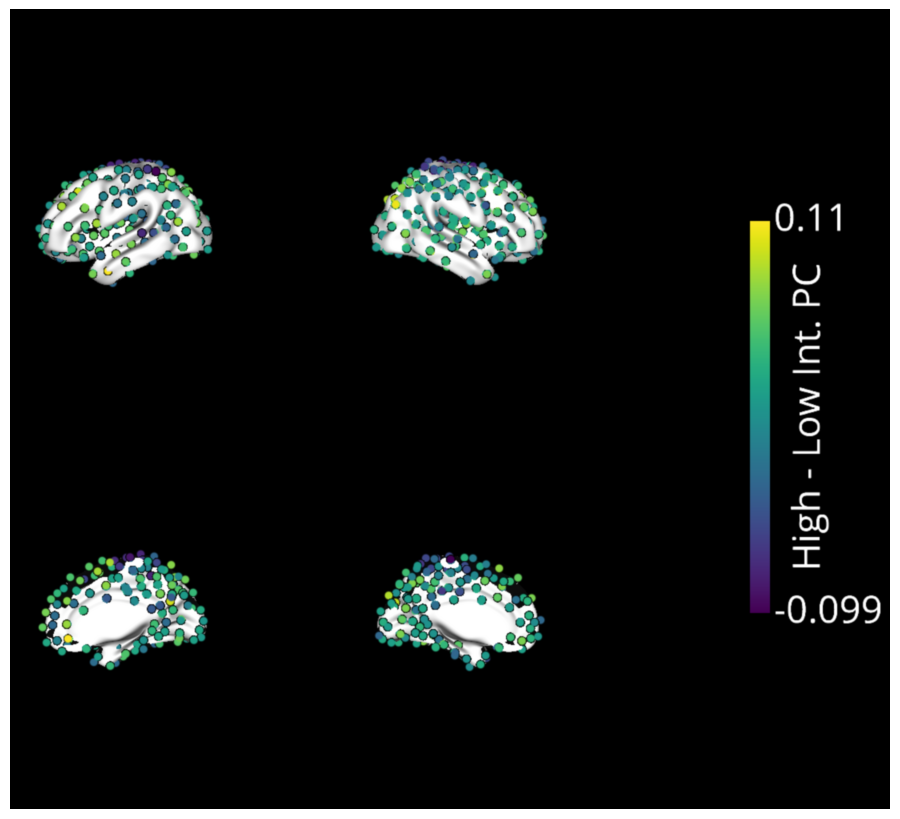

In [31]:
coupled_add_B3_to_scene(scene1=SC_PC1_HighmLow, scene2=SC_PC1_HighmLow2, data=PC1_HighmLow, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_PC1_HighmLow, data=PC1_HighmLow, row=0, col=2, cbtitle="High - Low Int. PC")

SC_PC1_HighmLow.preview(mpl=True)

## High minus Low interference 2nd PC scores

In [32]:
PC2_HighmLow = PC_high_int_2 - PC_low_int_2
PC2_HighmLow = np.hstack((PC2_HighmLow, PC2_HighmLow))

print("PC2_HighmLow min: " + str(PC2_HighmLow.min()))
print("PC2_HighmLow max: " + str(PC2_HighmLow.max()))

PC2_HighmLow min: -0.0867580646235987
PC2_HighmLow max: 0.09390439581696997


In [33]:
SC_PC2_HighmLow = SceneObj(bgcolor='black', size=(1100, 1000))
SC_PC2_HighmLow2 = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

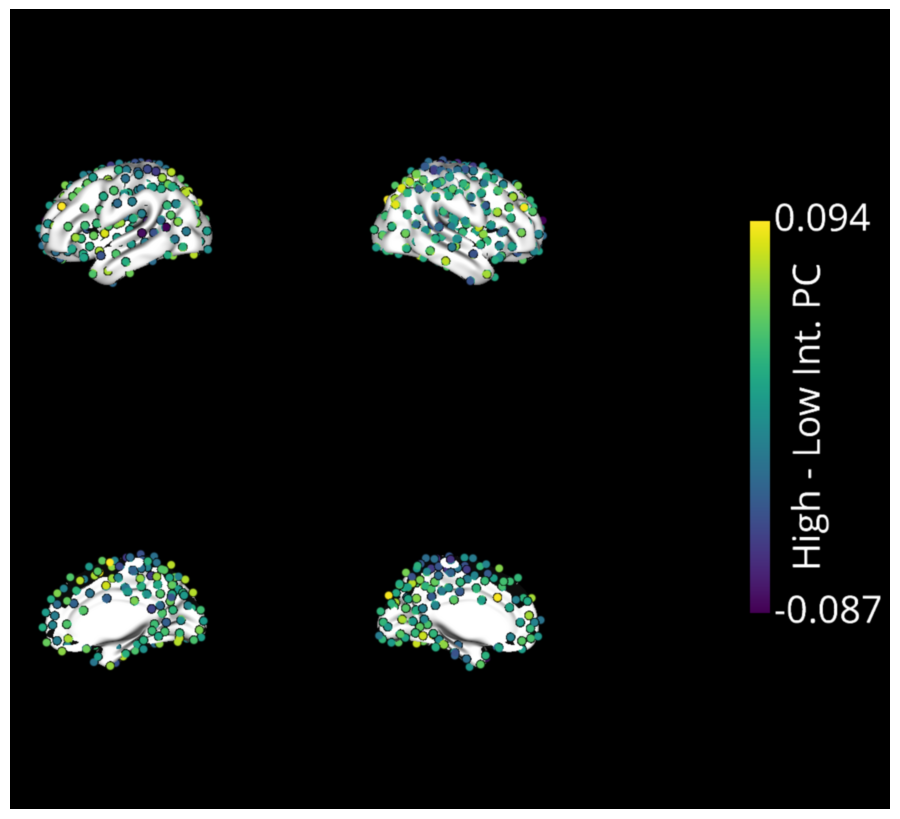

In [34]:
coupled_add_B3_to_scene(scene1=SC_PC2_HighmLow, scene2=SC_PC2_HighmLow2, data=PC2_HighmLow, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_PC2_HighmLow, data=PC2_HighmLow, row=0, col=2, cbtitle="High - Low Int. PC")

SC_PC2_HighmLow.preview(mpl=True)

## High minus Low interference 1st WCS scores

In [35]:
WCS1_HighmLow = WCS_high_int_1 - WCS_low_int_1
WCS1_HighmLow = np.hstack((WCS1_HighmLow, WCS1_HighmLow))

print("WCS1_HighmLow min: " + str(WCS1_HighmLow.min()))
print("WCS1_HighmLow max: " + str(WCS1_HighmLow.max()))

WCS1_HighmLow min: -0.537399684799552
WCS1_HighmLow max: 0.4349881472982397


In [36]:
SC_WCS1_HighmLow = SceneObj(bgcolor='black', size=(1100, 1000))
SC_WCS1_HighmLow2 = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

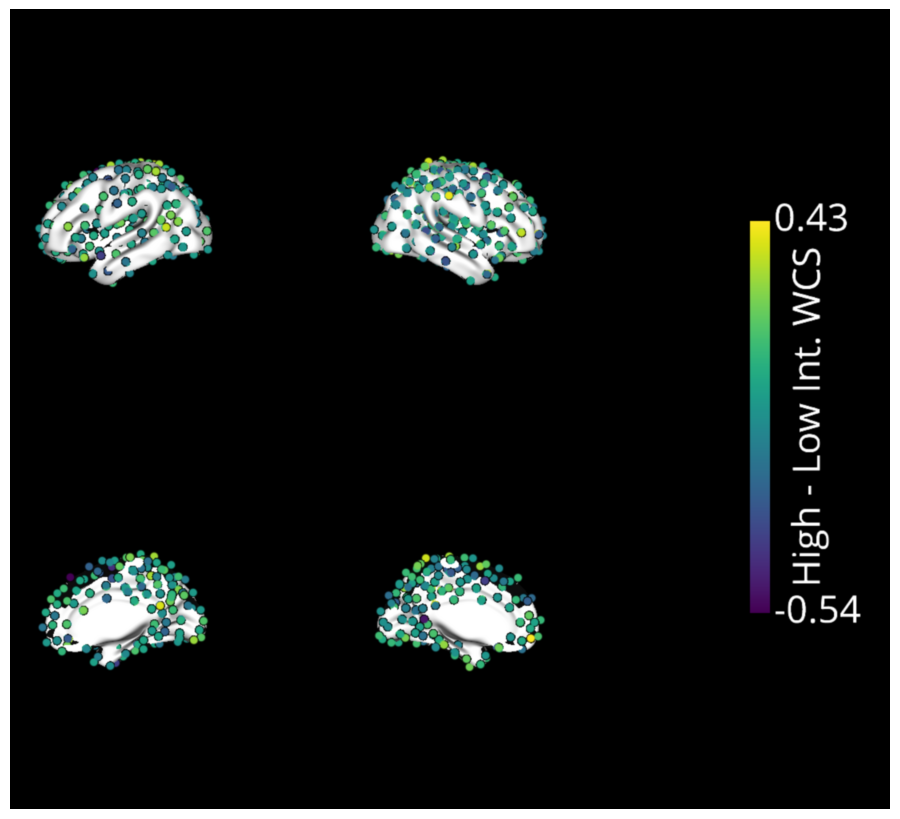

In [37]:
coupled_add_B3_to_scene(scene1=SC_WCS1_HighmLow, scene2=SC_WCS1_HighmLow2, data=WCS1_HighmLow, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_WCS1_HighmLow, data=WCS1_HighmLow, row=0, col=2, cbtitle="High - Low Int. WCS")

SC_WCS1_HighmLow.preview(mpl=True)

## High minus Low interference 2nd WCS scores

In [38]:
WCS2_HighmLow = WCS_high_int_2 - WCS_low_int_2
WCS2_HighmLow = np.hstack((WCS2_HighmLow, WCS2_HighmLow))

print("WCS2_HighmLow min: " + str(WCS2_HighmLow.min()))
print("WCS2_HighmLow max: " + str(WCS2_HighmLow.max()))

WCS2_HighmLow min: -0.4349579397061097
WCS2_HighmLow max: 0.5546150567788509


In [39]:
SC_WCS2_HighmLow = SceneObj(bgcolor='black', size=(1100, 1000))
SC_WCS2_HighmLow2 = SceneObj(bgcolor='black', size=(1100, 1000))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
    Color SourceExample using a data vector
BrainObj(name='B3') created
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources dete

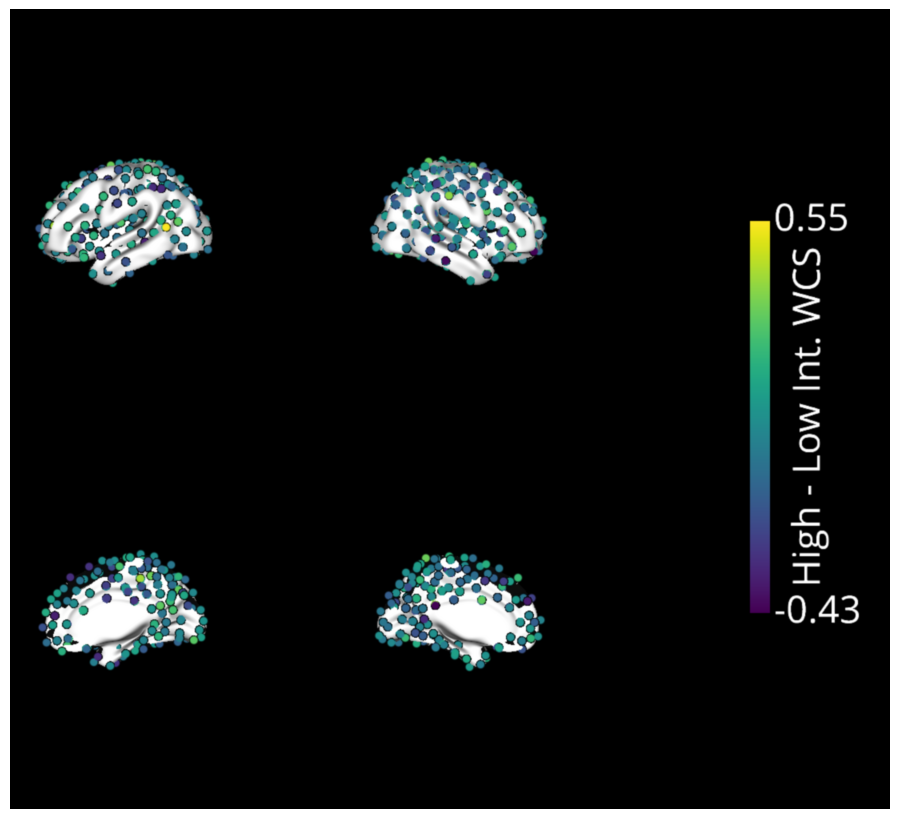

In [40]:
coupled_add_B3_to_scene(scene1=SC_WCS2_HighmLow, scene2=SC_WCS2_HighmLow2, data=WCS2_HighmLow, coords=coordinates)
add_CB_to_scene_2cols(scene=SC_WCS2_HighmLow, data=WCS2_HighmLow, row=0, col=2, cbtitle="High - Low Int. WCS")

SC_WCS2_HighmLow.preview(mpl=True)